# MSDA D214 Data Analytics Graduate Capstone

# PA Task 2: Data Analytics Report and Executive Summary

# Alaskan Eastern Bering Sea Snow Crab Geospatial Abundance Multiple Linear Regression Analysis

# Jessica Schmidt, Student ID: 010774455

# A. Research Question

Research Question: To what extent does snow crab gender, year of haul, bottom depth, surface temperature, bottom temperature, latitude, and longitude affect the catch per unit effort of snow crab (measure of abundance)?

Null hypothesis- Snow crab gender, year of haul, bottom depth, surface temperature, bottom temperature, latitude, and longitude do not statistically significantly affect the catch per unit effort of snow crab.

Alternate Hypothesis- Snow crab gender, year of haul, bottom depth, surface temperature, bottom temperature, latitude, and longitude do statistically significantly affect the catch per unit effort of snow crab.

Context and Justification: Snow Crab Fishermen of the Bering Sea in Alaska need to maximize the size of their hauls of snow crab. The National Oceanic and Atmospheric Association (NOAA) has tracked the size of snow crab hauls (a count of snow crab per haul) as well as other relevant factors (crab gender, bottom depth of haul, surface temperature, bottom temperature, year specimen was collected, latitude, and longitude) from 1975-2018. Therefore, it would be useful for snow crab fishermen to know which factors are associated with the size of a haul of snow crab. This Mutiple Linear Regression seeks to determine which of these factors are statistically significant and therefore relevant in assisting and informing snow crab fishermen when it comes time to fish.

# B. Data Collection

The data for this analysis comes from the National Oceanic and Atmospheric Association (NOAA) and is called "Snow Crab Geospatial Data (1975-2018)" with a subtitle of "Alaskan Snow Crab Eastern Bering Sea Geospatial Data (1975-2018)". The data is publicly available on Kaggle and comes from the U.S. Government. "The dataset contains catch per unit effort data of commercial snow crab landings in the Alaskan Eastern Bering Sea. The catch per unit effort is an indirect measure of the abundance of a target species. The data was collected from NOAA then cleaned for data analysis." (Source: NOAA Snow Crab Data)

Please note the following variables:

Dependent variable: Catch per unit effort ("cpue", quantitative numeric variable): Catch number per area the net swept in number/square nautical mile. This is an "indirect measure of the abundance of a target species".

Independent variables:
- Year ("year", numeric): The year the specimen was collected.
- Gender of snow crab ("sex", categorical)
- Bottom Depth ("bottom_depth", numeric): In Meters.
- Surface temperature ("surface_temperature", numeric): In tenths of a degree of Celsius.
- Bottom temperature ("bottom_temperature", numeric): Average temperature in tenths of a degree of Celsius.
- Latitude ("latitude", numeric): Decimal degrees at start of haul.
- Longitude ("longitude", numeric): Decminal degrees at start of haul.

Advantage: The advantage of this data gathering methodology is that it is easy to use and prepared for data analysis. The dataset is publicly available via Kaggle and has been collected by the NOAA. The file itself is in csv format, and, therefore, it will be easy to create the dataframe for analysis by using the read_csv() function. This is very useful in that it is one of the most common data analytics tools and therefore highly accessible to anyone seeking to use this dataset. This dataset is also from a highly respectable source (the NOAA) and therefore should allow for high value analysis. Finally, my favorite aspect of this dataset is that it is from 1975-2018 and will therefore provide a lot of data over a long time. There are 17,927 records in this dataset.

Disadvantage: The main disadvantage of this data methodology is that it does not provide a lot of different variables for our analysis. This may lead to issues down the line further into the analysis if we find that there aren't many statistically significant variables. Thus, since our null hypothesis suggests that the independent variables do not statistically significantly affect the catch per unit effort of snow crab, we may have a greater chance of accepting the null hypothesis as the result since we do not have a lot of variables to use.

Challenges Overcome: The biggest challenge to overcome with this data methodology is in choosing which variables to select for the analysis. Here, we should use at least five independent variables to have a good analysis. In this case, it is likely that we will be using snow crab gender, year of haul, bottom depth, surface temperature, bottom temperature, latitude, and longitude.

# C. Data Extraction and Preparation (Source: D206 Course Webinars)

The tools and techniques that will be used for this analysis are as follows: a multiple linear regression via the Python programming language in a Jupyter Notebook. 

I have chosen to use Python for this Multiple Linear Regression because Python has many useful packages/libraries specifically for data science and machine learning processes (i.e., scikit-learn). As Multiple Linear Regression is a known “Structured Learning” process, Python’s machine learning and data science packages will be highly appropriate. Also, Python’s syntax is simple and concise when performing regression analyses, making it highly readable and easy to understand. One disadvantage of using Python is that python can use a lot of memory which can cause issues in particularly big projects.(Source: D208 Course Textbook)

Herein, I will be using the following Python Libraries:

In [1]:
# Importing Relevant Packages

# Standard imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Vizualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistical packages
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

# Chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

# Model Reduction/VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing

Before beginning the MLR, it is imperative that we have cleaned and prepared the data for analysis. To do so, we will detect and treat duplicates, missing values, and outliers, as well as make necessary changes as appropriate such as re-expression of categorical variables.

In [2]:
# Import CSV file
df = pd.read_csv('/Users/astro/Downloads/mfsnowcrab.csv')

In [3]:
# Examine the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17927 entries, 0 to 17926
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   17927 non-null  int64  
 1   latitude             17927 non-null  float64
 2   longitude            17927 non-null  float64
 3   year                 17927 non-null  int64  
 4   name                 17927 non-null  object 
 5   sex                  17927 non-null  object 
 6   bottom_depth         17927 non-null  int64  
 7   surface_temperature  17927 non-null  float64
 8   bottom_temperature   17927 non-null  float64
 9   haul                 17927 non-null  int64  
 10  cpue                 17927 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.5+ MB


In [4]:
# Print the header
df.head()

,id,latitude,longitude,year,name,sex,bottom_depth,surface_temperature,bottom_temperature,haul,cpue
0,147038,57.00000,-166.45000,1975,snow crab,male,71,9.1,1.1,117,40356
1,147037,57.00000,-167.08333,1975,snow crab,male,71,8.7,1.4,118,68691
2,147036,57.00000,-167.68333,1975,snow crab,male,75,8.8,1.6,139,119748
3,147035,56.66667,-172.56667,1975,snow crab,male,132,6.1,2.5,89,7882
4,147034,56.66667,-171.96667,1975,snow crab,male,123,5.7,2.1,90,11258


In [5]:
# Detecting Duplicates
# No Duplicates Detected
df.duplicated()
print(df.duplicated().value_counts())

False    17927
dtype: int64


In [6]:
# Detecting Missingness
# No Missing Values Detected
df.isnull().sum()

id                     0
latitude               0
longitude              0
year                   0
name                   0
sex                    0
bottom_depth           0
surface_temperature    0
bottom_temperature     0
haul                   0
cpue                   0
dtype: int64

In [7]:
# Detecting outliers for Year variable
# No outliers present
df['z_score_year']=stats.zscore(df['year'])
df[['year','z_score_year']].head

<bound method NDFrame.head of        year  z_score_year
0      1975     -1.890836
1      1975     -1.890836
2      1975     -1.890836
3      1975     -1.890836
4      1975     -1.890836
...     ...           ...
17922  2018      1.680908
17923  2018      1.680908
17924  2018      1.680908
17925  2018      1.680908
17926  2018      1.680908

[17927 rows x 2 columns]>

(array([1136., 1680., 1585., 2211., 1691., 1857., 2006., 1819., 1871.,
        2071.]),
 array([-1.89083581, -1.53366141, -1.17648701, -0.81931261, -0.46213821,
        -0.1049638 ,  0.2522106 ,  0.609385  ,  0.9665594 ,  1.3237338 ,
         1.68090821]),
 <BarContainer object of 10 artists>)

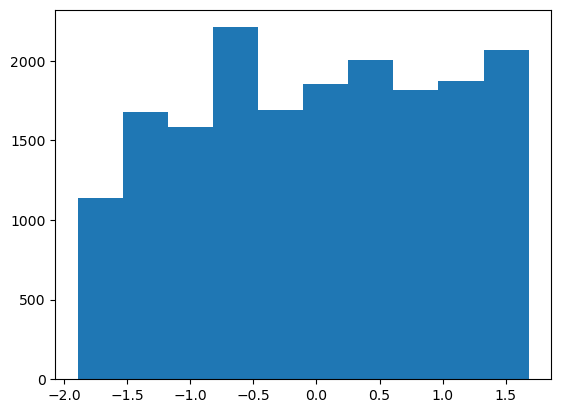

In [8]:
plt.hist(df['z_score_year'])

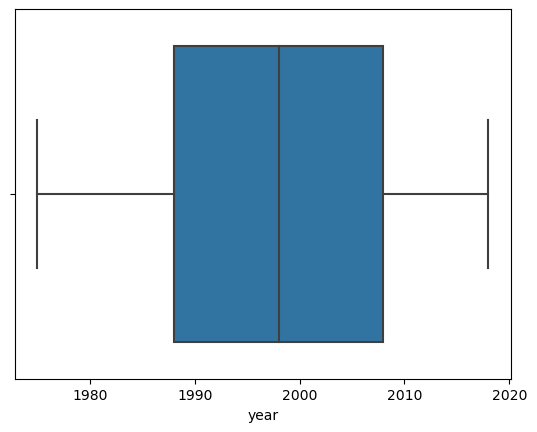

In [9]:
boxplot=sns.boxplot(x='year',data=df)

In [10]:
# Detecting outliers for Bottom Depth variable
# Outliers present but will be retained for analysis
df['z_score_bottom_depth']=stats.zscore(df['bottom_depth'])
df[['bottom_depth','z_score_bottom_depth']].head

<bound method NDFrame.head of        bottom_depth  z_score_bottom_depth
0                71             -0.670741
1                71             -0.670741
2                75             -0.529579
3               132              1.481990
4               123              1.164374
...             ...                   ...
17922            54             -1.270683
17923           113              0.811467
17924           101              0.387979
17925            93              0.105654
17926            82             -0.282544

[17927 rows x 2 columns]>

(array([6.570e+02, 5.490e+03, 5.152e+03, 3.915e+03, 2.310e+03, 3.770e+02,
        2.100e+01, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([-2.39998415, -1.5036011 , -0.60721806,  0.28916499,  1.18554804,
         2.08193108,  2.97831413,  3.87469718,  4.77108022,  5.66746327,
         6.56384632]),
 <BarContainer object of 10 artists>)

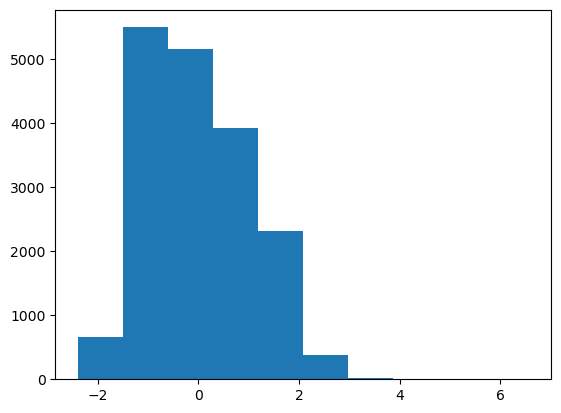

In [11]:
plt.hist(df['z_score_bottom_depth'])

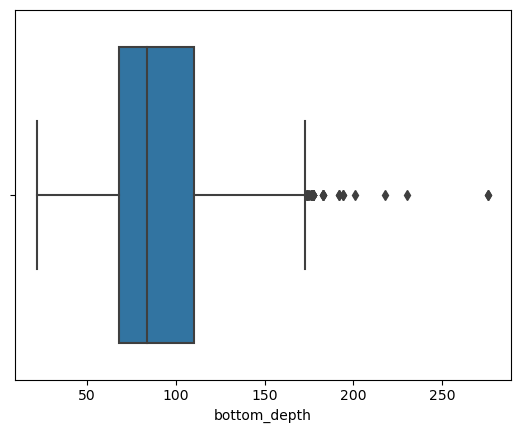

In [12]:
boxplot=sns.boxplot(x='bottom_depth',data=df)

In [13]:
# Detecting outliers for Surface Temperature variable
# Outliers present but will be retained for analysis
df['z_score_surface_temperature']=stats.zscore(df['surface_temperature'])
df[['surface_temperature','z_score_surface_temperature']].head

<bound method NDFrame.head of        surface_temperature  z_score_surface_temperature
0                      9.1                     0.998287
1                      8.7                     0.796175
2                      8.8                     0.846703
3                      6.1                    -0.517551
4                      5.7                    -0.719663
...                    ...                          ...
17922                  6.9                    -0.113328
17923                  7.6                     0.240368
17924                  7.5                     0.189840
17925                  7.9                     0.391952
17926                  7.7                     0.290896

[17927 rows x 2 columns]>

(array([  36.,  185.,  556., 1735., 3474., 5630., 4821., 1300.,  168.,
          22.]),
 array([-4.15556372, -3.3875389 , -2.61951408, -1.85148925, -1.08346443,
        -0.31543961,  0.45258521,  1.22061003,  1.98863485,  2.75665967,
         3.5246845 ]),
 <BarContainer object of 10 artists>)

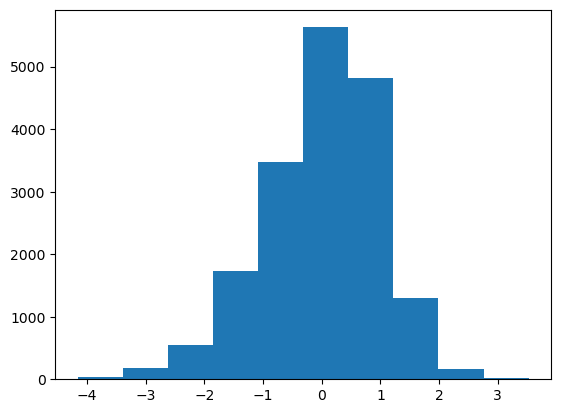

In [14]:
plt.hist(df['z_score_surface_temperature'])

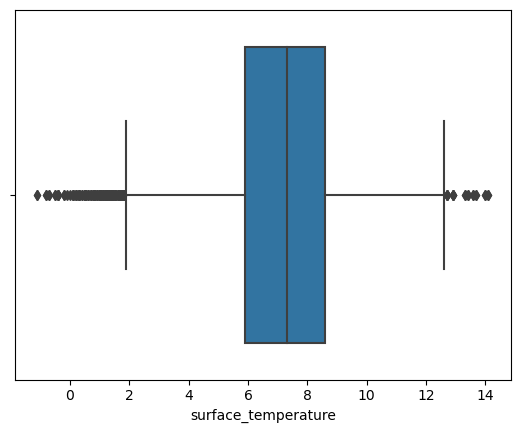

In [15]:
boxplot=sns.boxplot(x='surface_temperature',data=df)

In [16]:
# Detecting outliers for Bottom Temperature variable
# Outliers present but will be retained for analysis
df['z_score_bottom_temperature']=stats.zscore(df['bottom_temperature'])
df[['bottom_temperature','z_score_bottom_temperature']].head

<bound method NDFrame.head of        bottom_temperature  z_score_bottom_temperature
0                     1.1                   -0.404180
1                     1.4                   -0.231509
2                     1.6                   -0.116395
3                     2.5                    0.401618
4                     2.1                    0.171390
...                   ...                         ...
17922                 4.2                    1.380088
17923                 3.5                    0.977188
17924                 3.4                    0.919631
17925                 3.4                    0.919631
17926                 3.6                    1.034745

[17927 rows x 2 columns]>

(array([1816., 2094., 3529., 4446., 4310., 1588.,  101.,   18.,   13.,
          12.]),
 array([-2.24600505, -1.54956504, -0.85312502, -0.15668501,  0.539755  ,
         1.23619501,  1.93263502,  2.62907503,  3.32551505,  4.02195506,
         4.71839507]),
 <BarContainer object of 10 artists>)

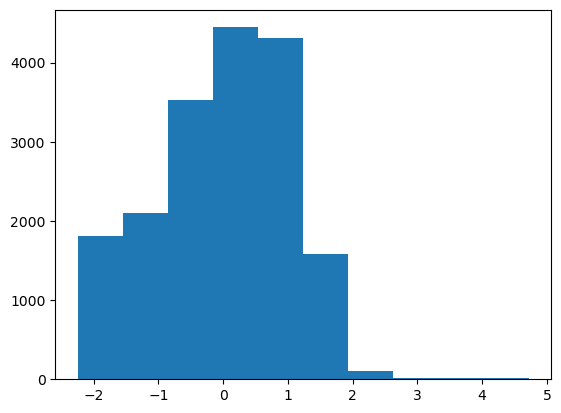

In [17]:
plt.hist(df['z_score_bottom_temperature'])

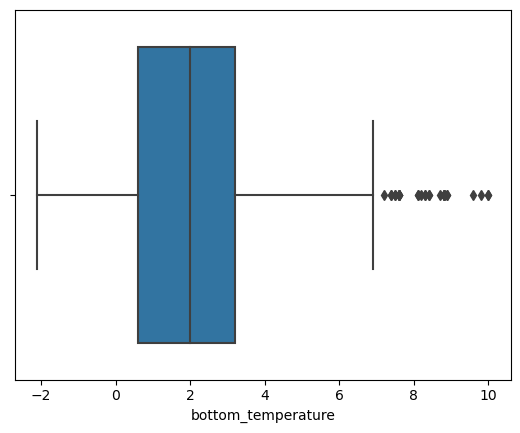

In [18]:
boxplot=sns.boxplot(x='bottom_temperature',data=df)

In [19]:
# Detecting outliers for Latitude variable
# No outliers detected
df['z_score_latitude']=stats.zscore(df['latitude'])
df[['latitude','z_score_latitude']].head

<bound method NDFrame.head of        latitude  z_score_latitude
0      57.00000         -0.913765
1      57.00000         -0.913765
2      57.00000         -0.913765
3      56.66667         -1.112844
4      56.66667         -1.112844
...         ...               ...
17922  59.01374          0.288931
17923  58.70274          0.103187
17924  58.67382          0.085915
17925  58.66392          0.080002
17926  58.66620          0.081364

[17927 rows x 2 columns]>

(array([ 438.,  863., 1974., 2564., 3181., 1935., 2140., 2375., 1512.,
         945.]),
 array([-2.30733352, -1.86669662, -1.42605971, -0.98542281, -0.54478591,
        -0.104149  ,  0.3364879 ,  0.7771248 ,  1.21776171,  1.65839861,
         2.09903552]),
 <BarContainer object of 10 artists>)

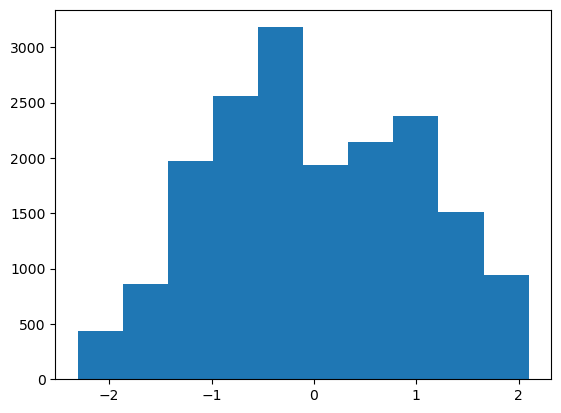

In [20]:
plt.hist(df['z_score_latitude'])

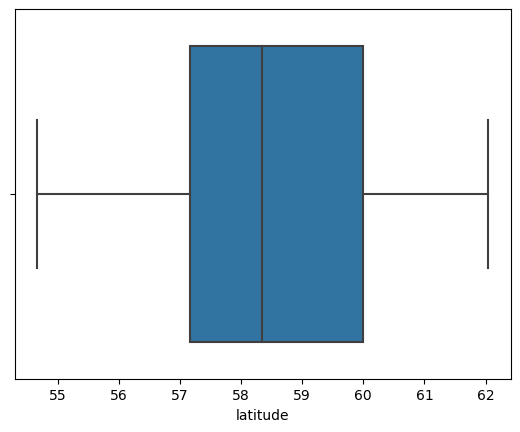

In [21]:
boxplot=sns.boxplot(x='latitude',data=df)

In [22]:
# Detecting outliers for Longitude variable
# Outliers detected but will be retained for analysis
df['z_score_longitude']=stats.zscore(df['longitude'])
df[['longitude','z_score_longitude']].head

<bound method NDFrame.head of        longitude  z_score_longitude
0     -166.45000           1.090233
1     -167.08333           0.926619
2     -167.68333           0.771616
3     -172.56667          -0.489938
4     -171.96667          -0.334935
...          ...                ...
17922 -169.17953           0.385090
17923 -173.01226          -0.605051
17924 -172.36066          -0.436718
17925 -171.72005          -0.271224
17926 -171.08591          -0.107401

[17927 rows x 2 columns]>

(array([1373., 2226., 3028., 3324., 3181., 2199., 1507.,  789.,  262.,
          38.]),
 array([-1.95120862, -1.43904909, -0.92688956, -0.41473003,  0.0974295 ,
         0.60958904,  1.12174857,  1.6339081 ,  2.14606763,  2.65822716,
         3.17038669]),
 <BarContainer object of 10 artists>)

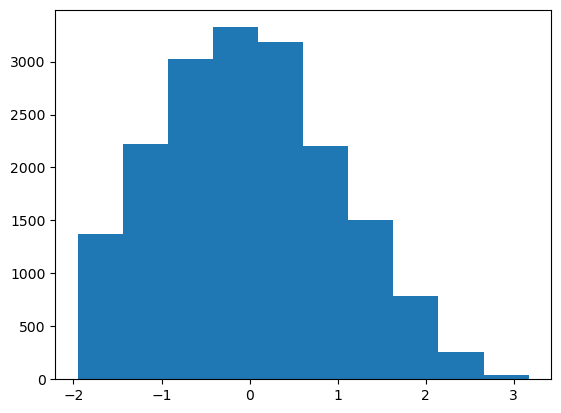

In [23]:
plt.hist(df['z_score_longitude'])

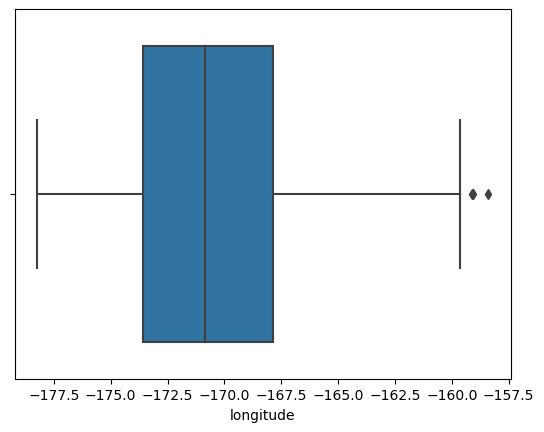

In [24]:
boxplot=sns.boxplot(x='longitude',data=df)

In [25]:
# Re-Expression of Categorical Variable

In [26]:
# Mapping bools
bool_mapping = {"female": 1, "male": 0}

# Re-expressing Gender of Crab variable
df["sex"] = df["sex"].map(bool_mapping)

In [27]:
# Confirm mapping
df['sex'].value_counts()

0    10411
1     7516
Name: sex, dtype: int64

In [28]:
# Summary Statistics
# The dependent variable for this MLR is the catch per unit effort "cpue"

- Catch per Unit Effort. This is the numeric dependent variable. The average catch per unit effort is 32875.69 with the maximum being 5117962.

In [29]:
df['cpue'].describe()

count    1.792700e+04
mean     3.287569e+04
std      1.154277e+05
min      5.200000e+01
25%      4.830000e+02
50%      3.215000e+03
75%      2.100850e+04
max      5.117962e+06
Name: cpue, dtype: float64

In [30]:
df.cpue.nlargest(n=20)

908      5117962
462      5040859
5102     4047058
1253     2592070
1464     2552965
817      2336447
920      2128407
1453     1804462
5895     1731310
888      1546776
468      1533047
446      1523541
6699     1456618
1026     1448480
17883    1442308
17684    1400910
16257    1397752
5574     1302025
5908     1256791
914      1220777
Name: cpue, dtype: int64

- Year. This is one of the numeric independent variables. The average year is 1998 with the maximum being 2018 (as expected).

In [31]:
df['year'].describe()

count    17927.000000
mean      1997.763653
std         12.039272
min       1975.000000
25%       1988.000000
50%       1998.000000
75%       2008.000000
max       2018.000000
Name: year, dtype: float64

- Bottom depth. This is one of the numeric independent variables. The average bottom depth is 90 meters with the maximum being 276 meters.

In [32]:
df['bottom_depth'].describe()

count    17927.000000
mean        90.006192
std         28.336891
min         22.000000
25%         68.000000
50%         84.000000
75%        110.000000
max        276.000000
Name: bottom_depth, dtype: float64

- Surface temperature. This is one of the numeric independent variables. The average surface temperature is 7.12 tenths of a degree of Celsius with the maximum being 1.41 degrees Celsius.

In [33]:
df['surface_temperature'].describe()

count    17927.000000
mean         7.124287
std          1.979158
min         -1.100000
25%          5.900000
50%          7.300000
75%          8.600000
max         14.100000
Name: surface_temperature, dtype: float64

- Bottom temperature. This is one of the numeric independent variables. The average bottom temperature is 1.8 tenths of a degree of Celsius with the maximum being 1.0 degrees Celsius.

In [34]:
df['bottom_temperature'].describe()

count    17927.000000
mean         1.802226
std          1.737456
min         -2.100000
25%          0.600000
50%          2.000000
75%          3.200000
max         10.000000
Name: bottom_temperature, dtype: float64

- Latitude. This is one of the numeric independent variables. The average latitude is 58.53 decimal degrees with the maximum being 62 decimal degrees.

In [35]:
df['latitude'].describe()

count    17927.000000
mean        58.529967
std          1.674403
min         54.666670
25%         57.166220
50%         58.344670
75%         59.992260
max         62.044500
Name: latitude, dtype: float64

- Longitude. This is one of the numeric independent variables. The average longitude is -170.67 decimal degrees with the maximum being -158.40 decimal degrees.

In [36]:
df['longitude'].describe()

count    17927.000000
mean      -170.670173
std          3.871000
min       -178.223090
25%       -173.589910
50%       -170.850250
75%       -167.850550
max       -158.397950
Name: longitude, dtype: float64

- Gender. This is our categorical independent variable. 7516 are female and 10411 are male.

In [37]:
df['sex'].value_counts()

0    10411
1     7516
Name: sex, dtype: int64

In [38]:
# Univariate and Bivariate Visualizations

In [39]:
# Univariate

(array([1.78e+04, 9.20e+01, 2.50e+01, 3.00e+00, 3.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 2.00e+00]),
 array([5.200000e+01, 5.118430e+05, 1.023634e+06, 1.535425e+06,
        2.047216e+06, 2.559007e+06, 3.070798e+06, 3.582589e+06,
        4.094380e+06, 4.606171e+06, 5.117962e+06]),
 <BarContainer object of 10 artists>)

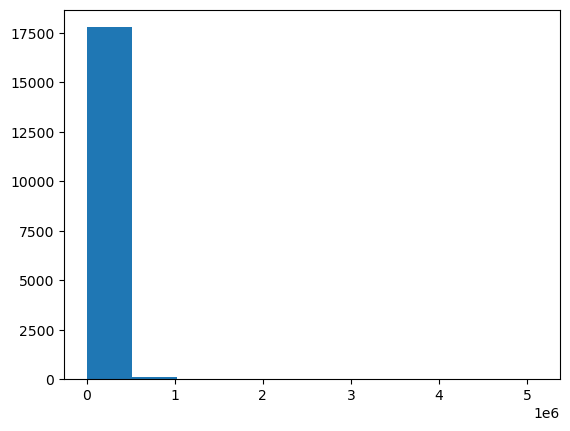

In [40]:
plt.hist(df['cpue'])

(array([1136., 1680., 1585., 2211., 1691., 1857., 2006., 1819., 1871.,
        2071.]),
 array([1975. , 1979.3, 1983.6, 1987.9, 1992.2, 1996.5, 2000.8, 2005.1,
        2009.4, 2013.7, 2018. ]),
 <BarContainer object of 10 artists>)

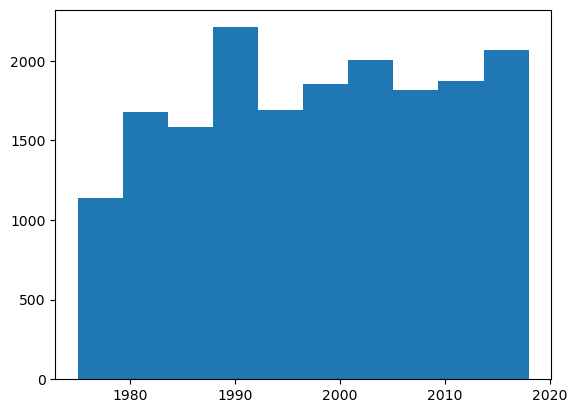

In [41]:
plt.hist(df['year'])

(array([10411.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7516.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

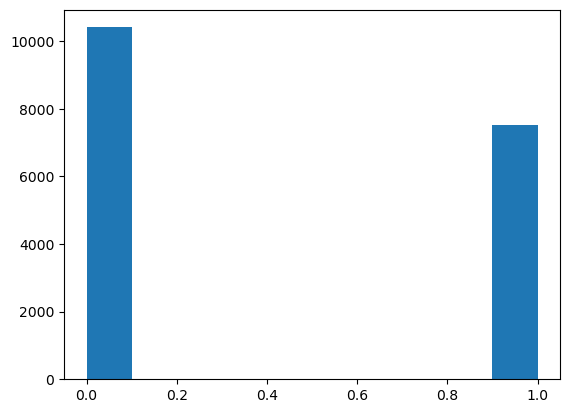

In [42]:
plt.hist(df['sex'])

(array([6.570e+02, 5.490e+03, 5.152e+03, 3.915e+03, 2.310e+03, 3.770e+02,
        2.100e+01, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([ 22. ,  47.4,  72.8,  98.2, 123.6, 149. , 174.4, 199.8, 225.2,
        250.6, 276. ]),
 <BarContainer object of 10 artists>)

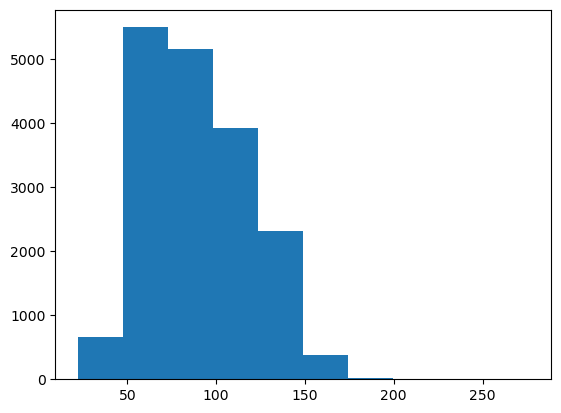

In [43]:
plt.hist(df['bottom_depth'])

(array([  36.,  185.,  556., 1735., 3474., 5630., 4821., 1300.,  168.,
          22.]),
 array([-1.1 ,  0.42,  1.94,  3.46,  4.98,  6.5 ,  8.02,  9.54, 11.06,
        12.58, 14.1 ]),
 <BarContainer object of 10 artists>)

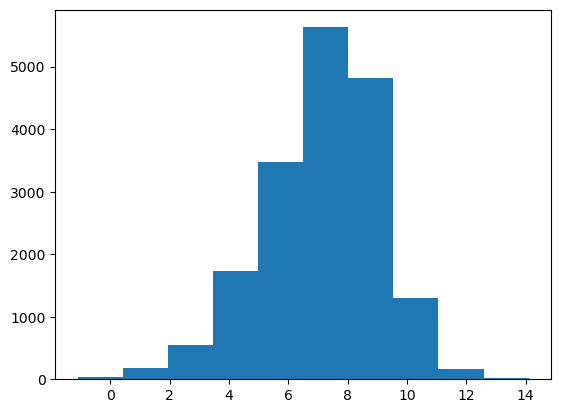

In [44]:
plt.hist(df['surface_temperature'])

(array([1816., 2094., 3529., 4446., 4310., 1588.,  101.,   18.,   13.,
          12.]),
 array([-2.1 , -0.89,  0.32,  1.53,  2.74,  3.95,  5.16,  6.37,  7.58,
         8.79, 10.  ]),
 <BarContainer object of 10 artists>)

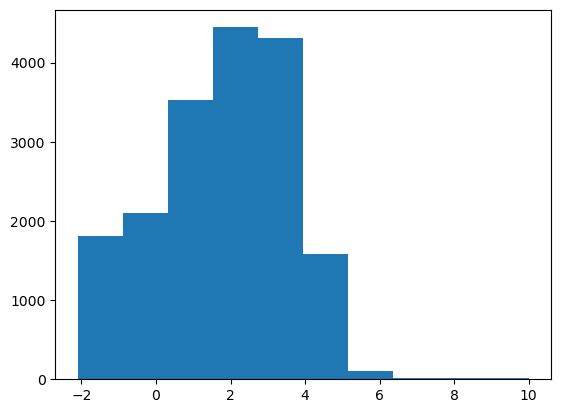

In [45]:
plt.hist(df['bottom_temperature'])

(array([ 438.,  863., 1974., 2564., 3181., 1935., 2140., 2375., 1512.,
         945.]),
 array([54.66667 , 55.404453, 56.142236, 56.880019, 57.617802, 58.355585,
        59.093368, 59.831151, 60.568934, 61.306717, 62.0445  ]),
 <BarContainer object of 10 artists>)

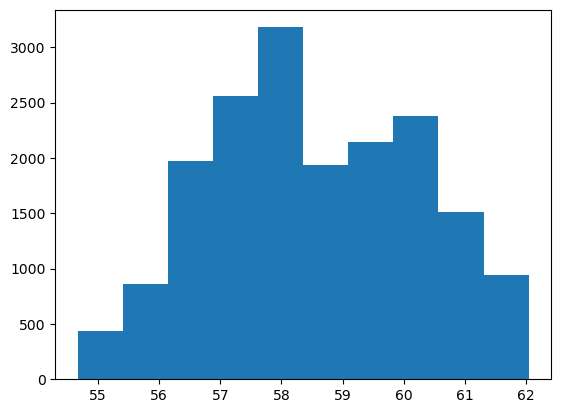

In [46]:
plt.hist(df['latitude'])

(array([1373., 2226., 3028., 3324., 3181., 2199., 1507.,  789.,  262.,
          38.]),
 array([-178.22309 , -176.240576, -174.258062, -172.275548, -170.293034,
        -168.31052 , -166.328006, -164.345492, -162.362978, -160.380464,
        -158.39795 ]),
 <BarContainer object of 10 artists>)

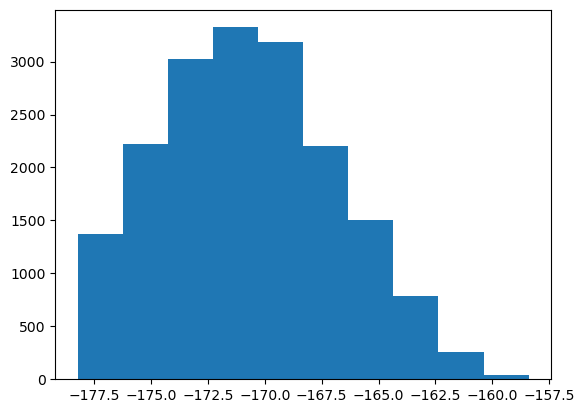

In [47]:
plt.hist(df['longitude'])

In [48]:
# Bivariate

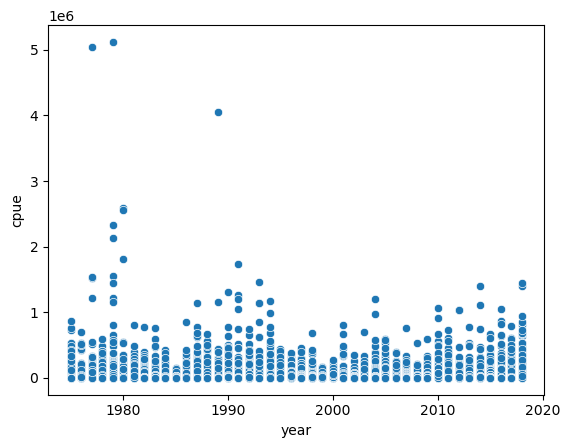

In [49]:
# Catch per Unit Effort and Year
sns.scatterplot(x=df['year'], y=df['cpue'])
plt.show();

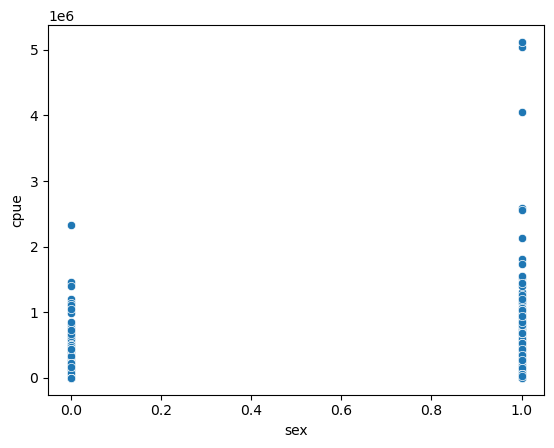

In [50]:
# Catch per Unit Effort and Gender of Snow Crab
sns.scatterplot(x=df['sex'], y=df['cpue'])
plt.show();

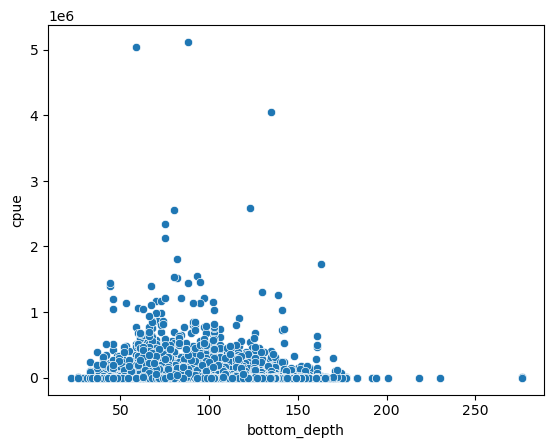

In [51]:
# Catch per Unit Effort and Bottom Depth
sns.scatterplot(x=df['bottom_depth'], y=df['cpue'])
plt.show();

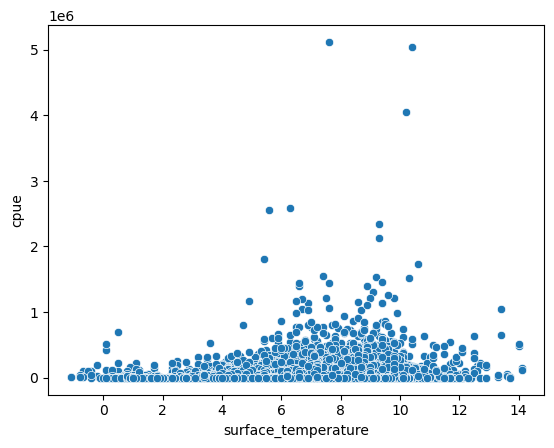

In [52]:
# Catch per Unit Effort and Surface Temperature
sns.scatterplot(x=df['surface_temperature'], y=df['cpue'])
plt.show();

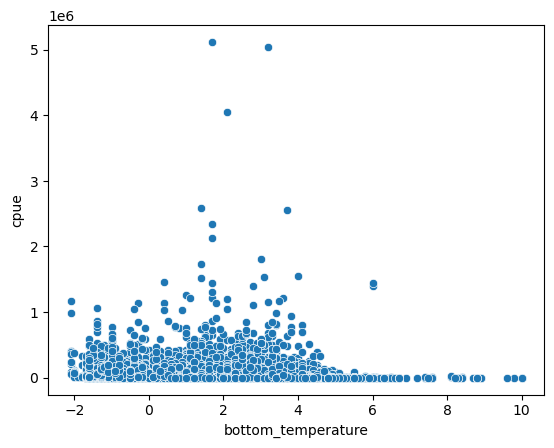

In [53]:
# Catch per Unit Effort and Bottom Temperature
sns.scatterplot(x=df['bottom_temperature'], y=df['cpue'])
plt.show();

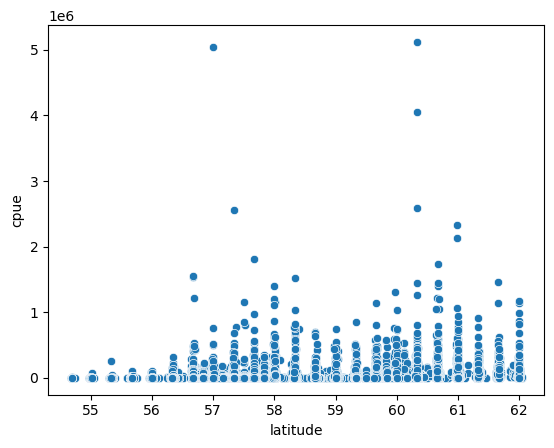

In [54]:
# Catch per Unit Effort and Latitude
sns.scatterplot(x=df['latitude'], y=df['cpue'])
plt.show();

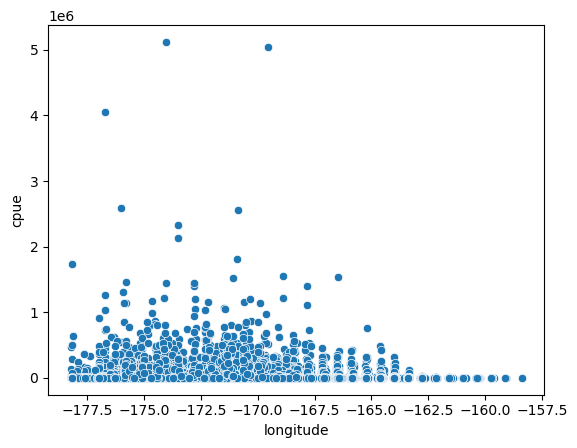

In [55]:
# Catch per Unit Effort and Longitude
sns.scatterplot(x=df['longitude'], y=df['cpue'])
plt.show();

In [56]:
# Final Prepared Dataset

In [57]:
mlr_df = df[['cpue','year','sex','bottom_depth','surface_temperature','bottom_temperature','latitude','longitude']]

In [58]:
# Normalizing the dataset
mlr_df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(mlr_df), columns=mlr_df.columns)
mlr_df

,cpue,year,sex,bottom_depth,surface_temperature,bottom_temperature,latitude,longitude
0,0.007875,0.0,0.0,0.192913,0.671053,0.264463,0.316262,0.593846
1,0.013412,0.0,0.0,0.192913,0.644737,0.289256,0.316262,0.561901
2,0.023388,0.0,0.0,0.208661,0.651316,0.305785,0.316262,0.531636
3,0.001530,0.0,0.0,0.433071,0.473684,0.380165,0.271082,0.285316
4,0.002190,0.0,0.0,0.397638,0.447368,0.347107,0.271082,0.315580
...,...,...,...,...,...,...,...,...
17922,0.000017,1.0,1.0,0.125984,0.526316,0.520661,0.589207,0.456166
17923,0.000075,1.0,1.0,0.358268,0.572368,0.462810,0.547054,0.262840
17924,0.000357,1.0,1.0,0.311024,0.565789,0.454545,0.543134,0.295707
17925,0.000107,1.0,1.0,0.279528,0.592105,0.454545,0.541792,0.328020


In [59]:
mlr_df.to_csv('/Users/astro/Downloads/crab_mlr_dataset.csv', index=False)

# D. Analysis (Source: D208 Course Webinars)

For this analysis, we will be performing a Multiple Linear Regression (MLR). 

The first assumption of a MLR is that the target/dependent variable is a continuous variable, whereas the independent variables can be continuous or categorical in nature. Second, for MLR, there are multiple independent variables (aka “predictor variables”) and one dependent variable (aka the “target variable”). Third, there is expected to be a linear relationship between the independent variables and the dependent variable. Finally, the independent variables should not be too highly correlated with one another. (Source: D208 Course Webinars)

The MLR is appropriate for the research question because the dependent variable (catch per unit effort) is a continuous numeric variable, which is required for MLR. Also, one advantage of MLR is it can be used to test the multiple independent variables regardless of whether they are numeric or categorical assuming they are correlated to the dependent variable. However, one disadvantage is that the MLR can have issues with multicollinearity wherein independent variables that are highly correlated can cause the model to be unstable (source: D208 Course Textbook).



In [60]:
# Initial MLR Model (source: Mark Keith and D208 Course Textbook)

In [61]:
y = mlr_df.cpue
x = mlr_df[['year','sex','bottom_depth','surface_temperature','bottom_temperature','latitude','longitude']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cpue   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     122.2
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          3.37e-176
Time:                        18:43:42   Log-Likelihood:                 42958.
No. Observations:               17927   AIC:                        -8.590e+04
Df Residuals:                   17919   BIC:                        -8.584e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
year                   -0.0046    

In [62]:
results.resid.std(ddof=x.shape[1])

0.02203810523650543

In [63]:
# Model Reduction

Here, we can see that all variables except longitude have statistically significant p-values (5% significance). This is favorable, however, there may also potentially be issues with multicollinearity. In this case, we weill need to check for multiconllinearity via checking the Variance Inflation Factor (VIF). Any VIF score will need to be below 10 in order to be retained for the final model.

In [64]:
# Checking VIF
x = mlr_df[['year','sex','bottom_depth','surface_temperature','bottom_temperature','latitude','longitude']]

vif_df = pd.DataFrame()
vif_df["feature"] = x.columns

vif_df["VIF"] = [variance_inflation_factor(x.values, i)
for i in range(len(x.columns))]

print(vif_df)

               feature        VIF
0                 year   4.593232
1                  sex   1.761116
2         bottom_depth   9.472607
3  surface_temperature  25.921542
4   bottom_temperature  10.452645
5             latitude   8.346545
6            longitude   4.692286


In [65]:
# Eliminate Surface Temperature (VIF = 25.92) and check VIF again
x = mlr_df[['year','sex','bottom_depth','bottom_temperature','latitude','longitude']]

vif_df = pd.DataFrame()
vif_df["feature"] = x.columns

vif_df["VIF"] = [variance_inflation_factor(x.values, i)
for i in range(len(x.columns))]

print(vif_df)

              feature       VIF
0                year  4.550015
1                 sex  1.758614
2        bottom_depth  7.625411
3  bottom_temperature  8.468064
4            latitude  4.776385
5           longitude  4.443668


The rest of the VIF values are acceptable. Now proceed with backward stepwise elimination. The largest p-value above 0.05 will be removed one by one until all variables are statistically significant.

In [66]:
y = mlr_df.cpue
x = mlr_df[['year','sex','bottom_depth','bottom_temperature','latitude','longitude']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cpue   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     119.9
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          4.69e-149
Time:                        18:43:43   Log-Likelihood:                 42892.
No. Observations:               17927   AIC:                        -8.577e+04
Df Residuals:                   17920   BIC:                        -8.572e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
year                  -0.0042      0

In [67]:
# The highest p-value is bottom_temperature (0.403) and will be removed.
y = mlr_df.cpue
x = mlr_df[['year','sex','bottom_depth','latitude','longitude']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cpue   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     143.7
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          5.27e-150
Time:                        18:43:43   Log-Likelihood:                 42892.
No. Observations:               17927   AIC:                        -8.577e+04
Df Residuals:                   17921   BIC:                        -8.573e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
year            -0.0042      0.001     -7.017   

In [68]:
# The highest p-value is longitude (0.060) and will be removed.
y = mlr_df.cpue
x = mlr_df[['year','sex','bottom_depth','latitude']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cpue   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          2.15e-150
Time:                        18:43:43   Log-Likelihood:                 42890.
No. Observations:               17927   AIC:                        -8.577e+04
Df Residuals:                   17922   BIC:                        -8.573e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
year            -0.0041      0.001     -6.928   

All remaining variables are statistically significant (p-value below 0.05). Here is the final model:

In [69]:
y = mlr_df.cpue
x = mlr_df[['year','sex','bottom_depth','latitude']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cpue   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          2.15e-150
Time:                        18:43:43   Log-Likelihood:                 42890.
No. Observations:               17927   AIC:                        -8.577e+04
Df Residuals:                   17922   BIC:                        -8.573e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
year            -0.0041      0.001     -6.928   

In [70]:
results.resid.std(ddof=x.shape[1])

0.02211939097660431

# E. Data Summary and Implications

The remaining variables are Year, Sex, Bottom Depth, and Latitude. These are the statistically significant variables (with p-values below 0.05). Now, it is time to revisit the research question and hypothesis:

Research Question: To what extent does snow crab gender, year of haul, bottom depth, surface temperature, bottom temperature, latitude, and longitude affect the catch per unit effort of snow crab (measure of abundance)?

- Null hypothesis- Snow crab gender, year of haul, bottom depth, surface temperature, bottom temperature, latitude, and longitude do not statistically significantly affect the catch per unit effort of snow crab.

- Alternate Hypothesis- Snow crab gender, year of haul, bottom depth, surface temperature, bottom temperature, latitude, and longitude do statistically significantly affect the catch per unit effort of snow crab.

In this case, our final MLR model shows that Year, Sex, Bottom Depth, and Latitude are statistically significant, meaning that we reject the null hypothesis and accept the alternate hypothesis: Snow crab gender, year of haul, bottom depth, and latitude do statistically significantly affect the catch per unit effort of snow crab.

One limitation of this analysis was that there were multiple variables with a high Variance Inflation Factor and/or a high p-value, so they had to be removed - also, as aforementioned, we were not given many independent variables for the analysis and we may have had more robust findings if there were more.

Also, please note that the r-squared value of the final model is a bit on the low side, however, we can still accept the results of the model because all of the p-values of the remaining independent variables (following the backward-stepwise elimination) are statistically significant (within 5%, as per industry standard).

As for the recommended course of action, we turn to the interpretation of results:

In [71]:
y = mlr_df.cpue
x = mlr_df[['year','sex','bottom_depth','latitude']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cpue   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          2.15e-150
Time:                        18:43:43   Log-Likelihood:                 42890.
No. Observations:               17927   AIC:                        -8.577e+04
Df Residuals:                   17922   BIC:                        -8.573e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
year            -0.0041      0.001     -6.928   

In [72]:
results.resid.std(ddof=x.shape[1])

0.02211939097660431

Model Equation:

$$
\hat{y} = 0.0017 - 0.0041(Year) + 0.0033(Sex) - 0.0105(Bottom Depth) + 0.0159(Latitude)
$$

Interpretation of Coefficients:
- Ceteris paribus, a one unit increase in Year results in 0.41% decrease in the Catch per Unit Effort.
- Ceteris paribus, a one unit increase in Bottom Depth results in 1.05% decrease in Catch per Unit Effort.
- Ceteris paribus, a one unit increase in Latitude results in 1.59% increase in Catch per Unit Effort.
- Ceteris paribus, female crab are 0.33% more likely to be in a Catch per Unit Effort.

Therefore, based on the interpretation of results, each year will result in a lower catch per unit effort, deeper bottom depths will result in a lower catch per unit effort, higher latitudes will result in a higher catch per unit effort, and female crab are more plentiful in terms of catch per unit effort.

With this in mind, snow crab fishermen can expect lower catch per unit effort of snow crab year-over-year and expect more female than male snow crab, and it is recommended that they fish at shallower depths and fish at higher latitudes for higher catch per unit effort.

For future courses of study, it would be most prudent to repeat this analysis with more independent variables (if available), and/or with more data over time. 

The data is from 1975 to 2018, and it is currently 2024. Consequently, I recommend collecting data from 2019-2024 and rerunning the analysis. 

Secondly, it could be useful to perform a different type of analysis on the data with a different chosen dependent variable. For example, since the gender of snow crab is statistically significant, it could be a good next step to perform a KNN analysis on the cateogorical variable of gender of the snow crab to determine if there are any predictive independent variables in the dataset.

# F. Sources

- NOAA Snow Crab Data: https://www.kaggle.com/datasets/mattop/snowcrab
- D206 Course Webinars
- D208 Course Webinars
- D208 Course Textbook - recommended by Dr. Middleton: Bruce, Peter, et al. "Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python"
- Mark Keith's "Learn Exploratory Data Analysis (EDA) in Python": https://www.youtube.com/watch?v=0-fkgpK2knA&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=9&ab_channel=MarkKeith

# G. Professional Communication

Please let this section serve as acknowledgement of professional communication used throughout.